# 축구선수 유망 예측 여부

## 스테이지 1. 문제 기반 학습의 이해

각 구단에서 나중에 활약을 펼칠 선수들을 미리 예측할 수 있다면, 구단의 순위, 재정 모든 방면에서 효율적일 것이다. 축구 선수 데이터를 이용해 유망한 선수인지를 판단하는 스카우터 역할 AI 모델을 만들어보자.

본 프로젝트에서는 16~21세의 축구 선수 데이터를 기반으로 유망성을 예측하는 모델을 만들게 된다. 특히 상관관계 분석을 학습하고 모델에 적용해보자.

데이터의 칼럼(column)은 총 66개 존재하는데 그 중 일부 칼럼만 살펴보자.
* ID: 해당 데이터에서의 고유한 ID
* Age: 나이
* Height: 신장
* Weight: 몸무게
* Position: 선수의 포지션
* PreferredFoot: 선수가 선호하는 발(왼발/오른발)
* AttackingWorkRate: 공격적 플레이에 대한 선호도
* DefensiveWorkRate: 수비적 플레이에 대한 선호도
* PaceTotal: 속력 및 가속력 종합
* ShootingTotal: 선수의 슈팅 능력
* PassingTotal: 선수의 전체적인 패스 능력
* Composure: 침착함에 대한 점수
* Prospect: 선수의 유망 여부(0/1) -> 예측해야하는 값(Target)

### 1. 데이터 읽어오기

판다스 라이브러리를 불러오고 데이터를 읽어오자

In [3]:
import pandas as pd

train = pd.read_csv('data/open/train.csv')
test = pd.read_csv('data/open/test.csv')
submission = pd.read_csv('data/open/sample_submission.csv')

데이터를 확인해보자

In [4]:
train.head(5)

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0


In [7]:
test.head(2)

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,TEST_0000,17,184,75,GK,Right,Medium,Medium,3.7681,5.3947,...,0.1351,0.5479,0.1351,0.2817,0.4286,0.2817,0.2857,0.2778,0.2857,5.50
1,TEST_0001,19,188,80,ST,Right,High,Medium,4.9275,4.8684,...,4.1892,3.4247,4.1892,3.0986,2.7143,3.0986,3.0000,3.0556,3.0000,0.75


## 스테이지 2. 데이터 탐색 기초

### 1. 데이터프레임 통계 확인

describe() 메서드는 데이터프레임에서 **열(column)의 기술 통계량**을 반환한다. 이를 통해 데이터프레임에서 **수치형 데이터로 이루어진 열들의 분포와 중심 경향성, 흩어진 정도** 등을 대략 파악할 수 있고, **이상치 여부** 또한 파악할 수 있다. train 데이터에 결측값은 존재하지 않지만, describe 메서드는 결측값(NaN)을제외하고 통계량을 계산하므로 데이터프레임에 포함된 열들의 실제 분포를 대략적으로 이해할 수 있다.

describe()를 이용하여 train 데이터의 기술 통계량을 확인해보자.

In [9]:
train.describe()

,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,...,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.00000,3019.000000,3019.000000,3019.000000
mean,19.632329,180.892348,73.081153,5.760521,4.292595,4.080918,4.708363,3.816096,4.549276,4.371896,...,4.748056,4.961191,4.874432,4.508399,4.874432,4.852789,4.33072,4.852789,1.424188,0.361047
std,1.235638,6.800187,6.539758,1.298024,1.624982,1.301538,1.366596,2.029423,1.414989,1.790045,...,1.677262,1.814854,1.815744,1.809723,1.815744,1.877633,1.88076,1.877633,1.606925,0.480384
min,16.000000,160.000000,49.000000,0.724600,0.526300,0.000000,0.000000,0.000000,0.000000,0.113600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000
25%,19.000000,176.000000,69.000000,4.927500,3.092100,3.235300,3.939400,1.842100,3.606600,3.295500,...,4.109600,4.459500,4.225400,3.571400,4.225400,4.000000,3.05560,4.000000,0.750000,0.000000
50%,20.000000,180.000000,73.000000,5.797100,4.605300,4.117600,4.848500,4.210500,4.590200,4.772700,...,5.068500,5.405400,5.211300,4.857100,5.211300,5.285700,4.58330,5.285700,0.875000,0.000000
75%,21.000000,185.500000,77.000000,6.666700,5.526300,5.000000,5.606100,5.526300,5.573800,5.681800,...,5.890400,6.081100,6.056300,5.857100,6.056300,6.142900,5.83330,6.142900,1.125000,1.000000
max,21.000000,204.000000,99.000000,9.710100,9.868400,8.235300,9.393900,8.684200,9.344300,8.522700,...,9.315100,9.189200,9.014100,9.142900,9.014100,9.142900,9.02780,9.142900,8.625000,1.000000


### 2. 범위 내 특정 열 데이터 조회

**loc[]** 는 데이터프레임에서 특정 행과 열을 선택하는 데 사용된다. loc는 "location"의 약어로, 라벨(Label)을 기반으로 데이터를 선택한다. loc[] 메서드는 일반적으로 **[인덱스, 칼럼명]** 구조로 되어 있다.

5부터 10 까지의 인덱스를 가지는 Age 칼럼(column)의 값을 loc[] 메서드를 사용하여 조회해보자

In [10]:
train.loc[5:10, 'Age']

5     18
6     20
7     21
8     19
9     18
10    20
Name: Age, dtype: int64

train 데이터프레임의 22번 인덱스의 Height 칼럼의 값을 확인해 보자.

In [11]:
train.loc[22, 'Height']

177

**iloc[]** 는 데이터프레임에서 특정 행과 열을 선택하는데 사용된다. iloc는 "integer location"의 약어로, 정수를 기반으로 데이터를 선택한다. **iloc[] 메서드** 는 일반적으로 **[인덱스, 선택하려는 열의 정수 기반 인덱스]** 구조로 되어 있다.

5부터 9 까지의 인덱스를 가지는 Age 칼럼(column)의 값을 iloc[] 메서드를 사용하여 조회해보자

In [12]:
train.iloc[5:9, 1]

5    18
6    20
7    21
8    19
Name: Age, dtype: int64

데이터프레임의 22번 인덱스의 'Age' 칼럼(column)의 값을 확인해 보자.

In [13]:
train.iloc[22, 1]

17

## 스테이지 3. 데이터 시각화

### 1. value_counts() 메서드를 활용한 선수의 유망 여부 빈도 확인

value_counts() 메서드는 특정 칼럼의 고유한 각 값의 빈도를 계산할 때 사용된다. 즉, 카테고리형 데이터가 어떻게 분포되어 있는지 확인하거나, 이상치를 파악할 때 주로 사용된다.

아래 코드의 실행 결과 0이 1929번, 1이 1090번 등장한다.

In [14]:
prospect_rate = train['Prospect'].value_counts()
prospect_rate

Prospect
0    1929
1    1090
Name: count, dtype: int64

### 2. 선수의 유망 여부 비율을 파이 그래프로 확인

**파이 차트**는 데이터의 상대적인 비율을 부채꼴 모양으로 시각화하는 방법이다. 그리고 다음과 같은 특징을 가지고 있는데,
1. 전체에 대한 부분의 상대적인 비율을 한 눈에 파악할 수 있다.
2. 각 부분의 비율을 부채꼴의 크기로 표현하여 직관적인 시각화를 제공한다.
하지만 너무 많은 범주를 가진 경우에는 부채꼴이 작아져 해석이 어려워질 수 있다.


맷플롯립(matplotlib) 라이브러리를 이용해 선수의 유망 여부(Prospect)의 빈도를 파이(Pie) 그래프로 시각화해 보자

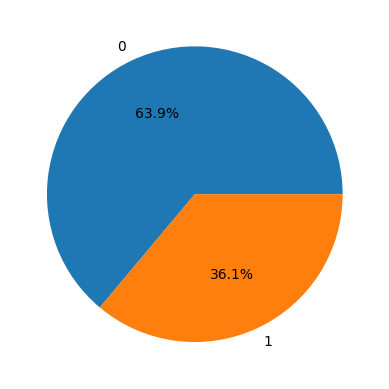

In [16]:
import matplotlib.pyplot as plt

pie_chart = plt.pie(
    x=prospect_rate,
    labels=['0', '1'],
    autopct='%.1f%%'
)

plt.show()

### 3. 선수가 선호하는 발의 비율을 파이 그래프로 확인

PreferredFoot 칼럼의 고유값의 빈도를 foot_rate 변수에 저장하여 선호하는 발의 빈도를 파이 그래프로 시각화해 보자.

결과를 확인해보면 오른발의 경우 전체의 75.7%, 왼발의 경우 24.3%를 차지한 것을 알 수 있다.

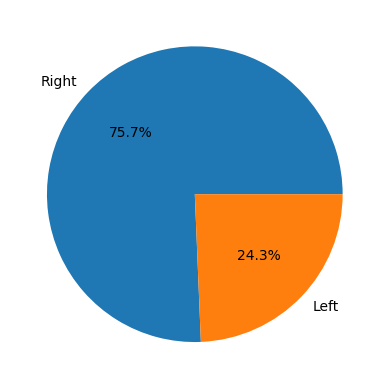

In [18]:
foot_rate = train['PreferredFoot'].value_counts()

pie_chart = plt.pie(
    x=foot_rate,
    labels=foot_rate.index,
    autopct='%.1f%%'
)

plt.show()

### 4. 선수의 유망 여부 파이 차트 시각화 - 색상 및 폭 조정

아래 결과는 위에서 시각화했던 차트에 색상 및 폭을 조정을 추가한 차트이다.

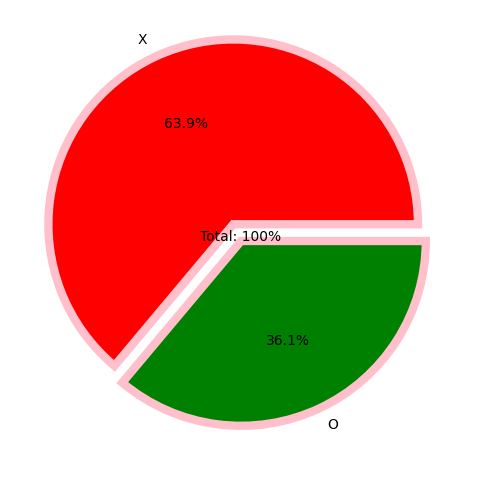

In [22]:
labels = ['X', 'O']
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(x = train['Prospect'].value_counts(),
        labels=labels,
        colors=colors,
        explode=explode,
        autopct='%.1f%%',
        wedgeprops={'linewidth':6, 'edgecolor': 'pink'})

plt.text(x=0, y=0, s='Total: 100%', horizontalalignment='center')
plt.show()

### 5. 선수의 포지션 빈도수 시각화

**countplot()** 함수는 seaborn 라이브러리에서 제공하는 함수로, **범주형(categorical) 변수의 빈도 수**를 막대그래프로 시각화하는데 사용된다. **countplot()** 함수는 데이터프레임에 **value_counts()** 함수를 사용하지 않아도 동일한 결과를 얻을 수 있는데, 내부적으로 데이터프레임의 칼럼을 분석하여 고유한 값들의 빈도를 계산하기 때문이다.

seaborn 라이브러리의 countplot() 함수를 사용하여 train DataFrame의 'Position' 열에 대한 값의 분포를 시각화 해보자.

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_13320\398558758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train['Position'], palette='husl')


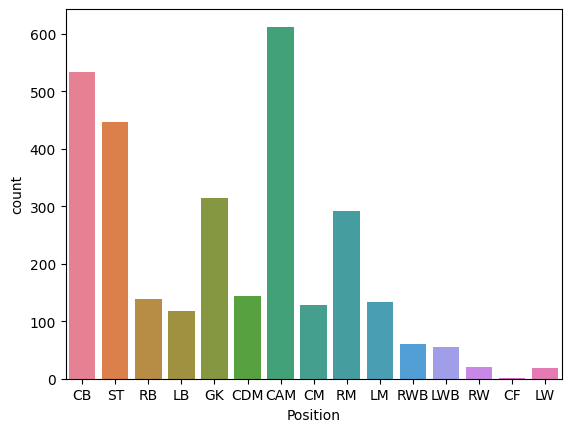

In [29]:
import seaborn as sns
ax = sns.countplot(x=train['Position'], palette='husl')
plt.show()

### 6. 선수의 포지션에 따른 유망 여부 빈도 확인

이전 스텝에서는 Position 칼럼의 빈도를 시각화하였다. 조금 더 나아가, hue 매개변수의 값을 **Prospect**로 입력하여 포지션별 유망 여부를 확인해보자.

seaborn 라이브러리의 countplot() 함수를 사용하여 train DataFrame의 'Position' 열에 따른 'Prospect' 열의 분포를 시각화해보자

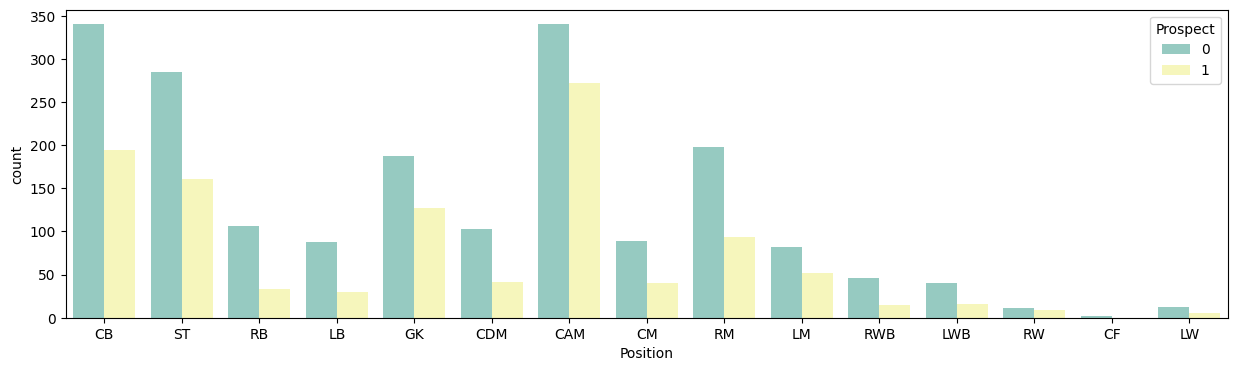

In [34]:
plt.figure(figsize=(15, 4))
ax = sns.countplot(data=train, x=train['Position'], hue='Prospect', palette='Set3')
plt.show()

## 스테이지 4. 분류 모델 만들기

* BaseLine(기초 수준의 모델) 만들기

### 1. 예측할 피처(Feature) 확인하기

loc 함수를 활용하여 이번 데이터에서 예측해야 하는 피처(feature)인 Prospect를 확인해 보자

In [35]:
train.loc[:, 'Prospect']

0       0
1       0
2       0
3       0
4       0
       ..
3014    1
3015    0
3016    0
3017    0
3018    0
Name: Prospect, Length: 3019, dtype: int64

### 2. 특성 데이터와 예측 데이터 나누기, 범주형 피처 drop

범주형 피처를 포함한 데이터를 머신러닝 모델에 학습시킬 수 없으므로, drop 함수를 사용하여 범주형 피처들을 제거한 후, 특성 데이터와 예측데이터로 나누자.

In [36]:
drop_col = ['ID', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']
test_x = test.drop(drop_col, axis=1)

drop_col.append('Prospect')
train_x = train.drop(drop_col, axis=1)
train_y = train['Prospect']

### 3. 모델 불러오기(Logistic Regression)

**로지스틱 회귀**는 분류 알고리즘 중 하나로, **이진 분류를 위한 확률 기반 모델**이다.

**model = LogisticRegression(max_iter=5000)** 는 **LogisticRegression** 모델을 인스턴스화하는 부분이다. LogisticRegression 클래스의 인스턴스를 생성하여 model 변수에 할당하고, **max_iter** 매개변수는 최적화 알고리즘의 반복횟수를 설정하는 것이다.

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

### 4. 모델 학습하기

fit(독립변수, 종속변수) 함수를 사용해서 모델을 학습시킨다. fit() 함수는 모델을 학습시키는 과정에서 독립 변수와 종속 변수 간의 관계를 학습하고, 모델의 내부 매개변수를 조정하여 최적의 예측 모델을 생성한다.

In [39]:
model.fit(train_x, train_y)

LogisticRegression(max_iter=5000)

### 5. 예측하기

model.predict(test_x) 코드는 학습된 모델을 사용하여 새로운 데이터에 대한 예측을 수행한다.

In [40]:
y_pred = model.predict(test_x)

## 스테이지 5. 상관 관계 분석과 전처리

* 상관관계 분석 학습하기
* 원핫 인코딩(One-Hot encoding) 학습하기

### 1. 데이터 상관관계 확인하기

상관관계는 두 변수가 함께 변화하는 정도를 나타내며, 데이터 분석에서 이를 확인하는 이유는 다양하다.

* 변수들 사이의 상관관계를 파악함으로써 데이터의 패턴과 관계성을 파악할 수 있다.
예로, '키'와 '몸무게'라는 두 변수가 양의 상관관계를 가진다면, 키가 커질수록 몸무게도 커지는 경향이 있다는 것을 알 수 있다. 이를 통해 키와 몸무게 간의 관계를 이해하고, 이를 활용해 예측 모델을 만들거나 키와 몸무게 간의 인과관계를 찾는 데 도움을 받을 수 있다.

* 또한 상관관계는 변수 선택에도 중요한 역할을 한다. 데이터셋에도 변수가 많을 경우, 변수 선택을 통해 모델의 성능을 향상시킬 수 있다. 상관과계가 높은 변수들은 서로 유사한 정보를 담고 있을 가능성이 높기 때문에, 이러한 변수들 중 하나를 선택하거나 새로운 변수를 생성해야 할 수 있다.

* 또 다른 활용은 다중공선성(multicollinearity)을 확인하는 데 있다. 다중공선성은 회귀분석 모델에서 오류가 발생할 수 있는 현상으로, 두 변수 사이에 강한 상관관계가 있을 때 나타난다. 상관관계를 통해 다중공선성을 파악하여 모델을 개선할 수 있다.

drop() 함수를 이용하여 train 데이터셋에서 not_numeric 리스트(list)를 제거해 보자
corr() 함수를 이용하여 numeric_df 데이터프레임(DataFrame)에서 숫자형 피처(feature)들 간의 상관관계를 계산해 보자

In [41]:
not_numeric = ['ID', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']
numeric_df = train.drop(columns=not_numeric)
corr = numeric_df.corr()
corr

,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
Age,1.000000,0.018988,0.080822,0.107841,0.093375,0.172423,0.146883,0.136092,0.274144,0.129849,...,0.133717,0.112939,0.149774,0.152902,0.149774,0.146105,0.144324,0.146105,0.019478,-0.582909
Height,0.018988,1.000000,0.743838,-0.384139,-0.097888,-0.172657,-0.295885,0.039815,0.440999,-0.480650,...,-0.390171,-0.456783,-0.303466,-0.201535,-0.303466,-0.251447,-0.062397,-0.251447,0.372424,0.010178
Weight,0.080822,0.743838,1.000000,-0.310781,-0.063294,-0.150032,-0.239219,0.035654,0.479184,-0.408269,...,-0.328367,-0.383186,-0.252259,-0.164336,-0.252259,-0.209222,-0.038580,-0.209222,0.324048,-0.025572
PaceTotal,0.107841,-0.384139,-0.310781,1.000000,0.312042,0.290279,0.557821,-0.094054,0.016908,0.564574,...,0.467228,0.605882,0.363656,0.220808,0.363656,0.301152,0.095544,0.301152,-0.306952,-0.093176
ShootingTotal,0.093375,-0.097888,-0.063294,0.312042,1.000000,0.602866,0.730978,-0.553480,-0.115810,0.141884,...,0.163928,0.250062,-0.241893,-0.283079,-0.241893,-0.325732,-0.464566,-0.325732,0.255293,-0.071425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBRating,0.146105,-0.251447,-0.209222,0.301152,-0.325732,0.161350,0.100034,0.797579,0.386306,0.710517,...,0.826768,0.730987,0.992579,0.983404,0.992579,1.000000,0.954882,1.000000,-0.745881,-0.144201
CBRating,0.144324,-0.062397,-0.038580,0.095544,-0.464566,0.042816,-0.085025,0.900099,0.529902,0.506513,...,0.675316,0.532908,0.917685,0.959100,0.917685,0.954882,1.000000,0.954882,-0.638604,-0.141780
RBRating,0.146105,-0.251447,-0.209222,0.301152,-0.325732,0.161350,0.100034,0.797579,0.386306,0.710517,...,0.826768,0.730987,0.992579,0.983404,0.992579,1.000000,0.954882,1.000000,-0.745881,-0.144201
GKRating,0.019478,0.372424,0.324048,-0.306952,0.255293,0.196670,0.063342,-0.306770,-0.028701,-0.667026,...,-0.751010,-0.778403,-0.768249,-0.692050,-0.768249,-0.745881,-0.638604,-0.745881,1.000000,0.006496


### 2. 상관관계 살펴보기

이미 계산된 상관관계 데이터프레임에서 타겟 변수인 Prospect과의 상관관계가 가장 큰 숫자형 피처들을 추출해보자

abs() 함수를 이용하여 타겟변수(Prospect)와 다른 피처들 간의 상관관계를 추출해 보자.
sort_values() 함수를 이용하여 값을 내림차순으로 정렬해 보자. ascending = False 로 설정하면 값이 내림차순으로 정렬된다.
iloc 함수를 이용하여 abs_corr 리스트의 첫 10개의 값만 선택해 보자.

In [48]:
abs_corr = abs(corr['Prospect'])
abs_corr = abs_corr.sort_values(ascending=False)
top_10_corr = abs_corr.iloc[:10]
top_10_corr

Prospect            1.000000
Age                 0.582909
Reactions           0.235083
PhysicalityTotal    0.226080
Stamina             0.189974
Strength            0.146012
LWBRating           0.145756
RWBRating           0.145756
CDMRating           0.144564
LBRating            0.144201
Name: Prospect, dtype: float64

### 3. 데이터 상관관계 히트맵

히트맵(heatmap)을 사용하면 여러 피처(Feature) 간의 상관관계를 한 눈에 비교할 수 있다. 먼저, 상위 10개의 상관관계가 가장 높은 피처들을 확인해보자.

아래는 상관계수 행렬을 시각화한 히트맵이다. 양의 상관간계일수록 밝은 색으로 표시되고, 음의 상관관계일수록 진한 색으로 표시된다.

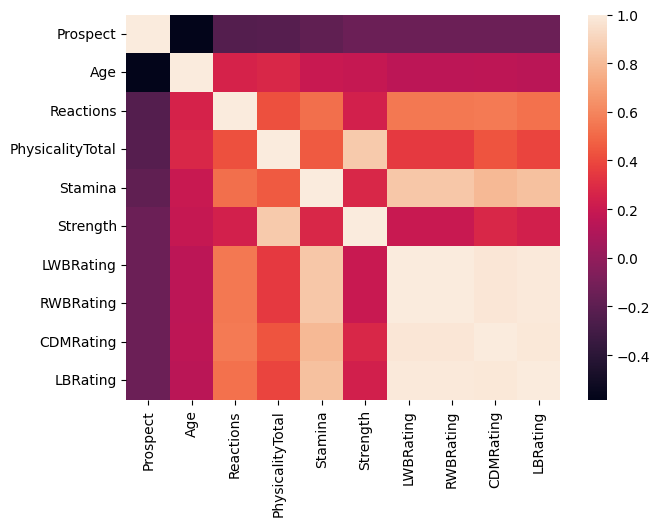

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
sns.heatmap(numeric_df[top_10_corr.index].corr())

plt.show()

### 4. One-Hot Encoding(원-핫 인코딩) 적용

Scikit-learn 라이브러리의 OneHotEncoder를 사용하여 범주형 변수인 Position을 원-핫 인코딩해보자

OneHotEncoder() 객체를 생성해 보자..

train 데이터프레임의 Position 피처(feature)를 입력으로 넣어보자. 단, OneHotEncoder는 2차원 배열을 입력으로 받아야 한다.
fit_transform() 함수를 사용하여 인코딩을 수행하고, toarray() 함수를 사용하여 희소행렬(Sparse Matrix)을 밀집 배열(Dense Array)로 변환해 보자.

[문제] test 데이터프레임의 Position 피처를 입력으로 넣어보자. 단, OneHotEncoder는 2차원 배열을 입력으로 받아야 한다.
transform() 함수를 사용하여 인코딩을 수행하고, toarray() 함수를 사용하여 희소행렬(Sparse Matrix)을 밀집 배열(Dense Array)로 변환해 보자.

In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
train_encoded = ohe.fit_transform(train[['Position']]).toarray()
test_encoded  = ohe.fit_transform(test[['Position']]).toarray()

print(train_encoded)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 5. One-Hot Encoding된 열들을 새로운 데이터프레임으로 생성

원-핫 인코딩 된 데이터를 가지고 새로운 데이터프레임을 생성하고, 열 이름을 설정해보자

[문제]
pd.DataFrame() 함수를 이용하여 원-핫 인코딩된 데이터프레임(train_encoded)을 새로운 데이터프레임으로 변환해 보자
columns 인자에는 get_feature_names_out() 함수를 이용하여 Position 인자를 전달해 보자

In [63]:
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(['Position']))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(['Position']))

### 6. train,Test 데이터 프레임에 One-Hot Encoding(원-핫 인코딩)된 데이터프레임 추가

원-핫 인코딩된 새로운 데이터프레임을 원본 데이터 프레임에 열 방향으로 추가해보자

[문제] pd.concat() 함수를 사용하여 train, train_encoded_df 두 데이터프레임을 합쳐보자.
axis = 1 로 설정하면 열 방향으로 합친다.
pd.concat() 함수를 사용하여 test, test_encoded_df 두 데이터프레임을 합쳐보자.
axis = 1 로 설정하면 열 방향으로 합친다.

In [65]:
train = pd.concat([train, train_encoded_df], axis=1)
test = pd.concat([test, test_encoded_df], axis=1)

train.head()

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 7. train과 test 데이터프레임에서 'Position' 피처 제거

[문제 7]
원-핫 인코딩으로 변환된 'Position' 칼럼은 더 이상 필요하지 않기 때문에, 해당 칼럼을 제거해보자

In [71]:
#train = train.drop(['Position'], axis=1)
#test = test.drop(['Position'], axis=1)

## 스테이지 6. 모델링 실습

### 1. 파일 읽어오기

In [95]:
import pandas as pd

train = pd.read_csv('data/open/train.csv')
test = pd.read_csv('data/open/test.csv')
submission = pd.read_csv('data/open/sample_submission.csv')

### 2. 범주형 변수 제거

In [96]:
not_numeric = ['ID', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']

train_transfered = train.drop(not_numeric, axis=1)
test_transfered = test.drop(not_numeric, axis=1)

### 3. train 데이터프레임에서 prospect와의 상관관계가 높은 상위 7개 피처 추출

In [97]:
abs_corr = abs(train_transfered.corr())['Prospect']
abs_corr_sort = abs_corr.sort_values(ascending=False)[1:8]
col_names = abs_corr_sort.index
col_names

Index(['Age', 'Reactions', 'PhysicalityTotal', 'Stamina', 'Strength',
       'LWBRating', 'RWBRating'],
      dtype='object')

### 4. x_train / y_train 추출

In [98]:
x_train = train_transfered[col_names]
y_train = train_transfered['Prospect']

### 5. 학습/검증 세트 분리

기존의 x_train과 y_train 데이터셋을 학습 및 검증(validation) 셋으로 분리한다.

In [99]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### 6. LogisticRegression(로지스틱 회귀) 모델 학습

In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(train_x, train_y)

LogisticRegression(max_iter=5000)

### 7. 로지스틱 회귀 모델의 검증 데이터에 대한 Micro F1 Score 평가

마이크로 F1 스코어는 모든 클래스별 TP, FP, TN, FN을 합산한 값으로 전체 클래스의 정밀도(Precision)와 재현율(Recall)을 계산한다. 이는 불균형한 클래스 분포를 가진 데이터셋에서 모델 성능을 평가하는 데 유용한 지표이다.

In [101]:
from sklearn.metrics import f1_score

val_pred = model.predict(val_x)
score = f1_score(val_y, val_pred, average='micro')

print('Micro F1 score: ', score)

Micro F1 score:  0.7533112582781457


### 8. 로지스틱 회귀 모델을 사용하여 test 데이터셋에 대해 예측 수행

학습시킨 모델을 이용해 test 데이터를 예측해보자.

In [102]:
test_x = test_transfered[col_names]

y_pred = model.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### 9. 예측 결과를 submission 데이터프레임에 추가

예측한 결과를 submission 데이터의 'Prospect' 칼럼에 할당해 보자.

In [103]:
submission['Prospect'] = y_pred
submission.head()

,ID,Prospect
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,0
4,TEST_0004,1


### 10. submission 파일 저장하기

In [105]:
submission.to_csv('submission.csv', index=False)

# 축구선수의 유망 여부 예측 AI 해커톤 공부